# 1) Problem Statement
The aim is to predict the customer churn rate based on historical churn data

# 2) Data
Data is made available in csv format with 10000 entries and 9 columns

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

%matplotlib inline

In [103]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_excel('data\customer_churn_large_dataset.xlsx')

In [13]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [14]:
df.shape

(100000, 9)

Dataset columns are CustomerID, Name, Age, Gender, Location, Subscription_Length_Months, Monthly_Bill, Total_Usage_GB, Churn

# 3) Data Checks performed
1. Check missing values
2. Check duplicates
3. Check datatypes of each columns 
4. Check number of unique values in each columns
5. Check statistics
6. Check categories of each column

In [15]:
#checking missing values
df.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [16]:
#checking duplicated values
df.duplicated().sum()

0

In [17]:
#checking datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [18]:
#checking number of unique values in each column
df.nunique()

CustomerID                    100000
Name                          100000
Age                               53
Gender                             2
Location                           5
Subscription_Length_Months        24
Monthly_Bill                    7001
Total_Usage_GB                   451
Churn                              2
dtype: int64

In [19]:
#checking statistics of the data
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


From this the insight is that about 75 percent of customers have zero churn.

In [21]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [29]:
#checking for categories in variables
print('Categories in Gender variable')
print(df['Gender'].unique())

print('Categories in Location variable')
print(df['Location'].unique())

print('Categories in Churn variable')
print(df['Churn'].unique())

Categories in Gender variable
['Male' 'Female']
Categories in Location variable
['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston']
Categories in Churn variable
[0 1]


In [27]:
categorical_features = ['CustomerID','Name', 'Gender', 'Location', 'Churn']
numerical_features = [features for features in df.columns if features not in categorical_features]

In [28]:
print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features: ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']
We have 5 categorical features: ['CustomerID', 'Name', 'Gender', 'Location', 'Churn']


In [47]:
young_max_users = df[df['Age'] <= 40]['Churn'].count()
print(young_max_users)
old_max_users = df[df['Age'] > 40]['Churn'].count()
print(old_max_users)


43287
56713


More customer belong to age group more than 40

# 4) Exploratory Data Analysis (EDA) - Visualization

In [73]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


### Univariate Analysis

#### Categorical Data - Gender, Location, Churn, Age(for fun)
1. Count Plots

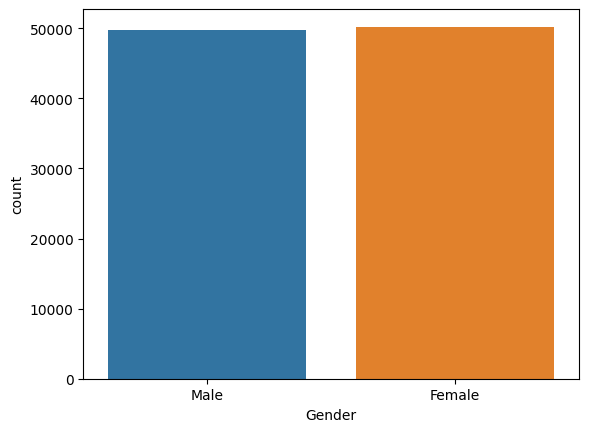

In [104]:
sns.countplot(x = 'Gender', data = df)
plt.show()

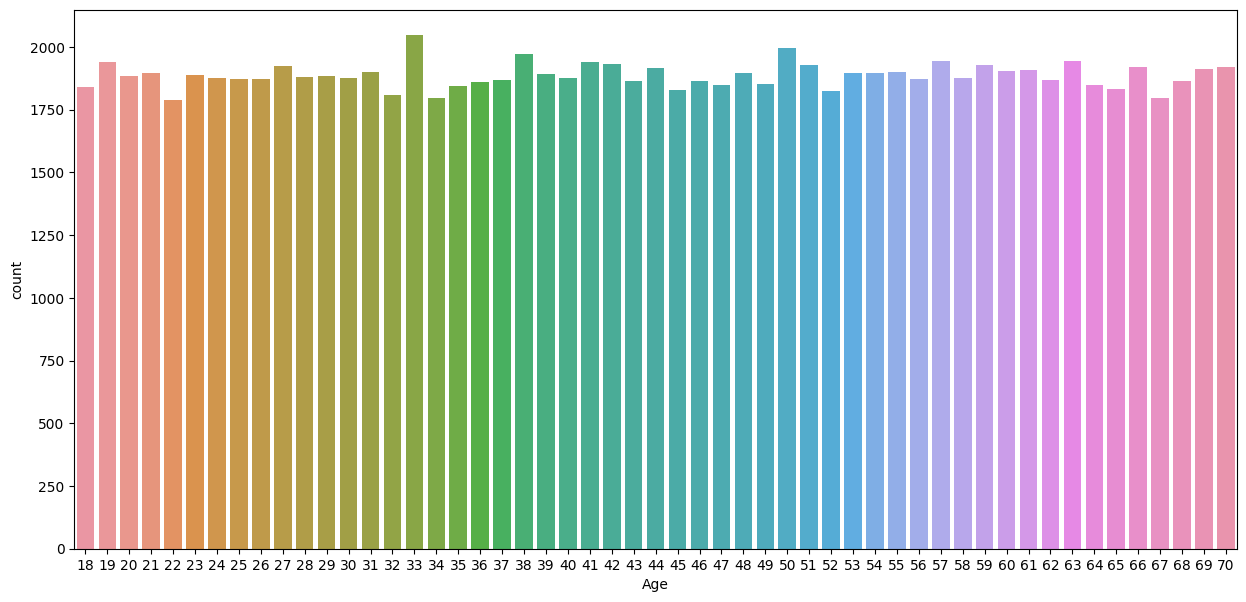

In [105]:
# Age is a numerical data, no need to make count plots but made for fun
fig, axs = plt.subplots(1, 1, figsize = (15,7))
plt.subplot(111)
sns.countplot(x = 'Age', data = df)
plt.show()

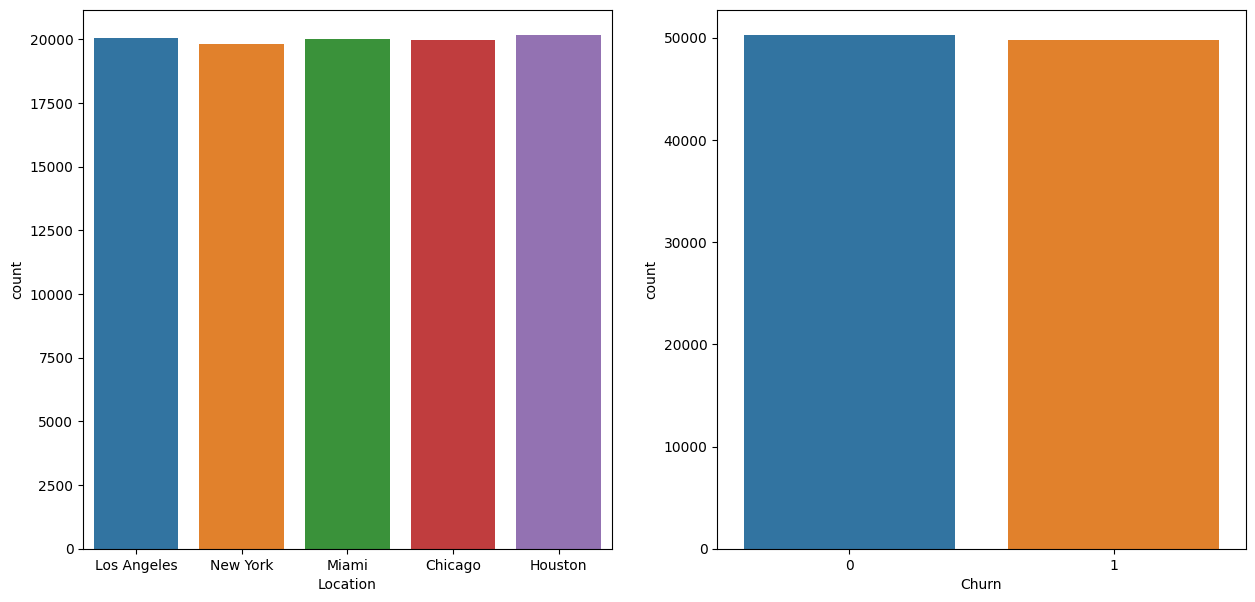

In [106]:
fig, axs = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(121)
sns.countplot(x = 'Location', data = df)
plt.subplot(122)
sns.countplot(x = 'Churn', data = df)
plt.show()

2. Pie Charts

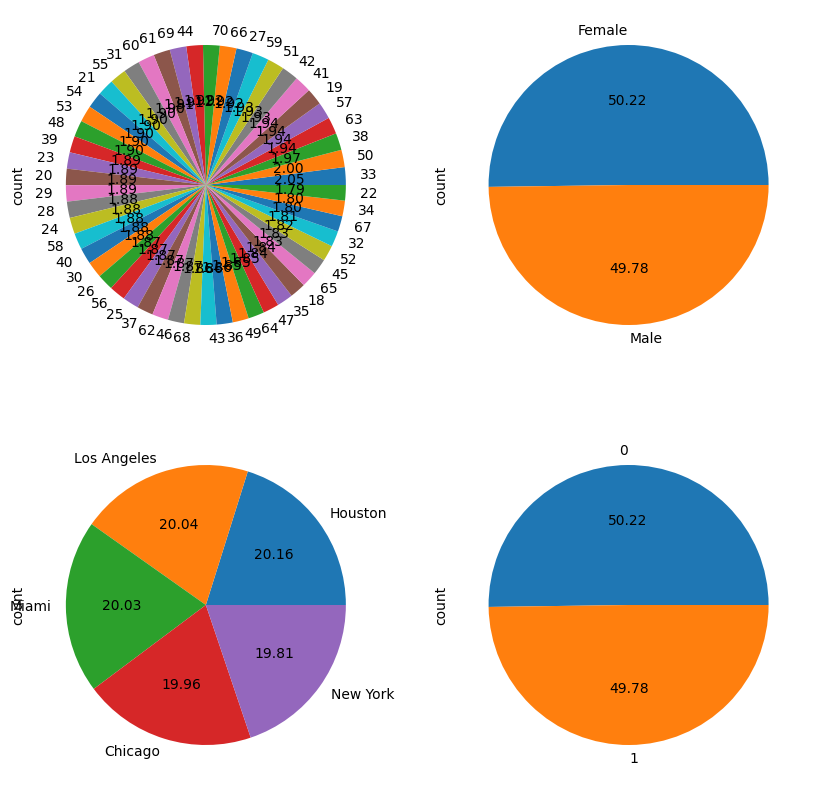

In [115]:
fig, axs = plt.subplots(2, 2, figsize = (10,10))        #The figure has 2 rows, 2 columns and size 15x15
plt.subplot(2,2,1)                                      #The figure has 2 rows, 2 columns and it is the first plot
df['Age'].value_counts().plot(kind="pie", autopct="%.2f")
plt.subplot(2,2,2)
df['Gender'].value_counts().plot(kind="pie", autopct="%.2f")
plt.subplot(2,2,3)
df['Location'].value_counts().plot(kind = "pie", autopct = "%.2f")
plt.subplot(2,2,4)
df['Churn'].value_counts().plot(kind = 'pie', autopct = '%.2f')
plt.show()

INSIGHT: The data is almost equally distributed over Gender, Age, Location and Churn based on Count values

#### Numerical Data - Age, Subscription_Length_Months, Monthly_Bill, Total_Usage_GB
1. Histograms

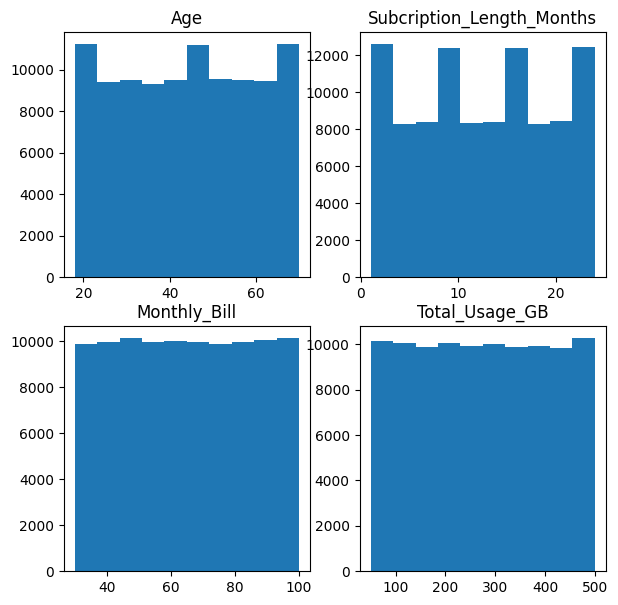

In [116]:
fig, axs = plt.subplots(2, 2, figsize = (7,7))
plt.subplot(2,2,1)
plt.title('Age')
plt.hist(df['Age'], bins = 10)
plt.subplot(2,2,2)
plt.title('Subcription_Length_Months')
plt.hist(df['Subscription_Length_Months'], bins = 10)
plt.subplot(2,2,3)
plt.title('Monthly_Bill')
plt.hist(df['Monthly_Bill'], bins = 10)
plt.subplot(2,2,4)
plt.title('Total_Usage_GB')
plt.hist(df['Total_Usage_GB'], bins = 10)
plt.show()

2. Distplot (KDE-Kernel Density Estimation)

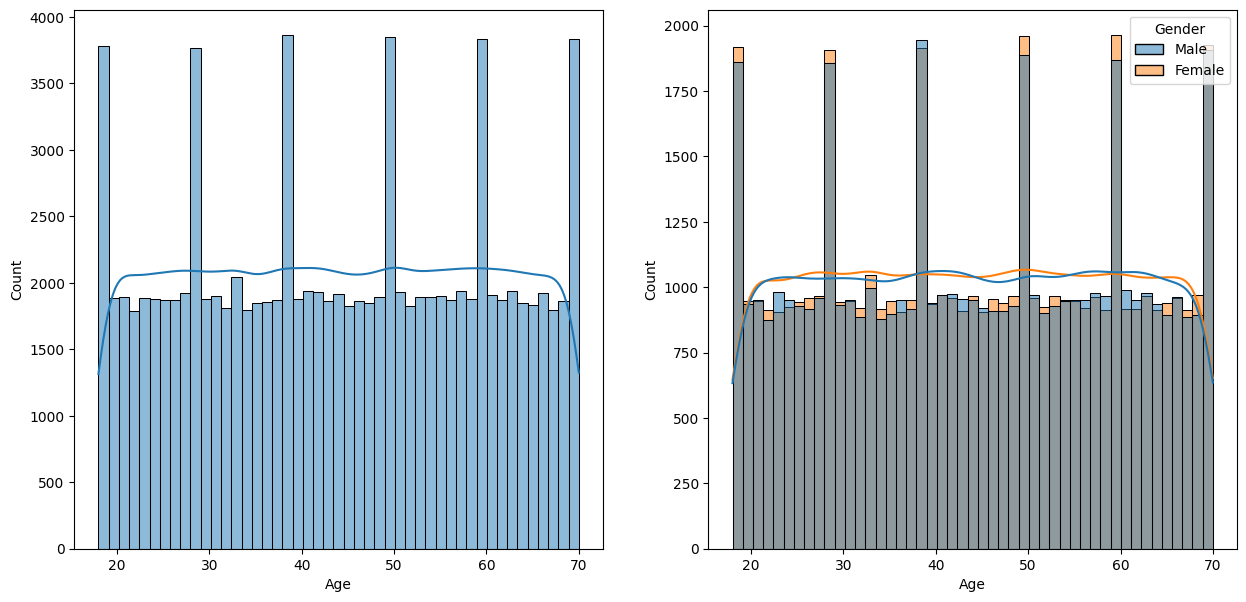

In [109]:
fig, axs = plt.subplots(1, 2, figsize = (15,7))
plt.subplot(1, 2, 1)
sns.histplot(data = df, x = 'Age', kde = True)
plt.subplot(1, 2, 2)
sns.histplot(data = df, x = 'Age', kde = True, hue = 'Gender')
plt.show()

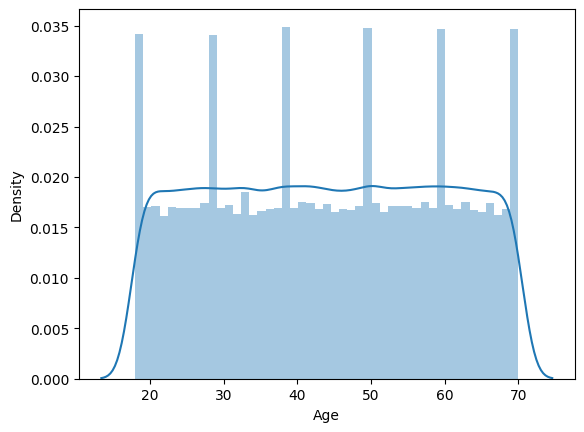

In [110]:
sns.distplot(df['Age'])
plt.show()

3. Boxplot - gives minimum, maximum and interqaurtile range

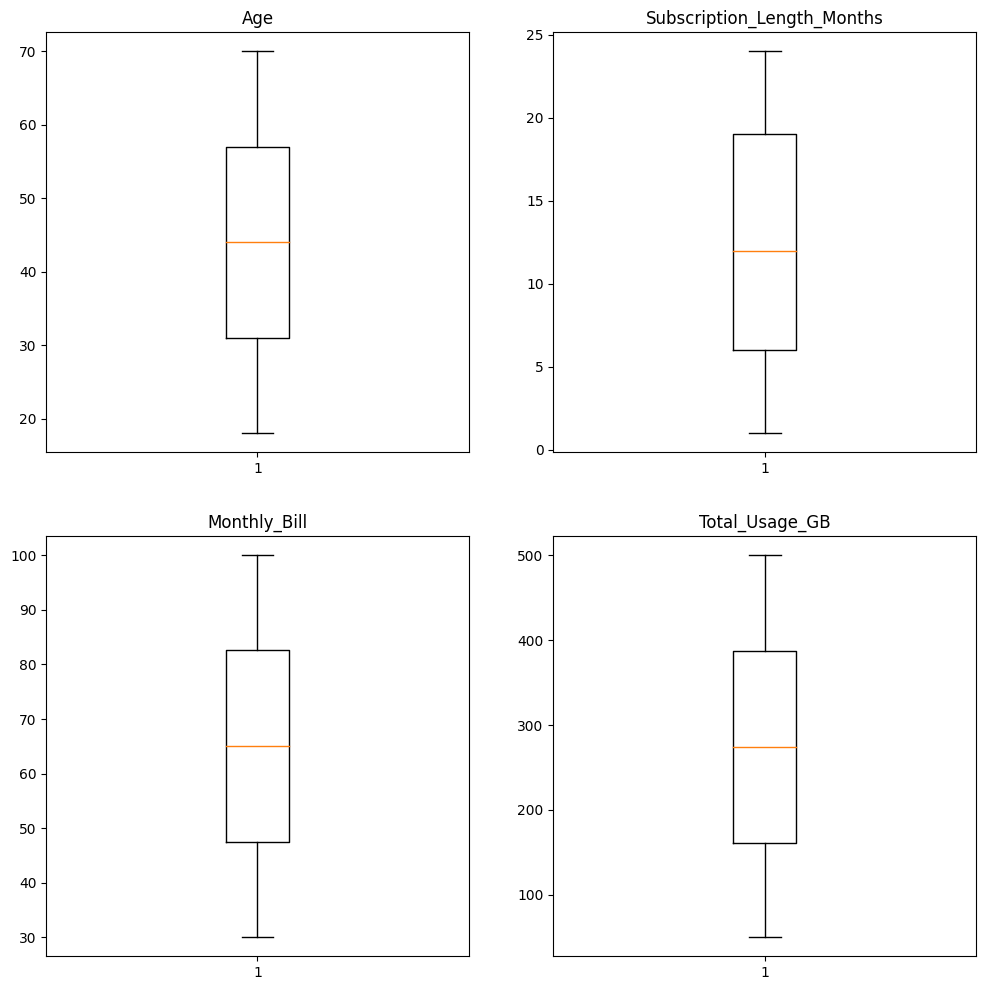

In [118]:
fig, axs = plt.subplots(2, 2, figsize = (12,12))
plt.subplot(2,2,1)
plt.title('Age')
plt.boxplot(df['Age'])
plt.subplot(2,2,2)
plt.title('Subscription_Length_Months')
plt.boxplot(df['Subscription_Length_Months'])
plt.subplot(2,2,3)
plt.title('Monthly_Bill')
plt.boxplot(df['Monthly_Bill'])
plt.subplot(2,2,4)
plt.title('Total_Usage_GB')
plt.boxplot(df['Total_Usage_GB'])
plt.show()

INSIGHT: No outliers, no skewness

### Multivariate Analysis


In [119]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


#### Numerical vs Numerical

1. Scatter plot

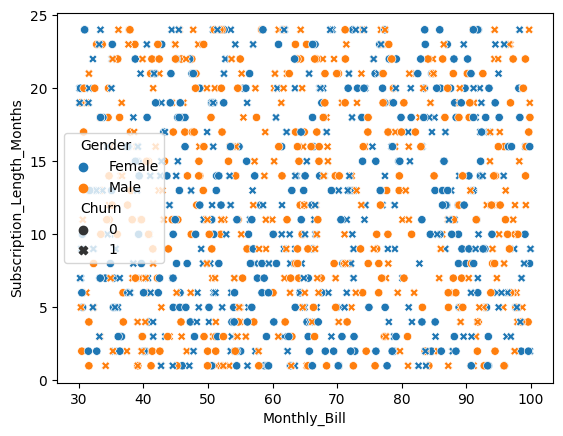

In [132]:
sample = df.sample(1000)
sns.scatterplot(data = sample, x = "Monthly_Bill", y = "Subscription_Length_Months", hue = 'Gender', style = 'Churn')
plt.show()

#### Numerical vs Categorical

1. Bar plot

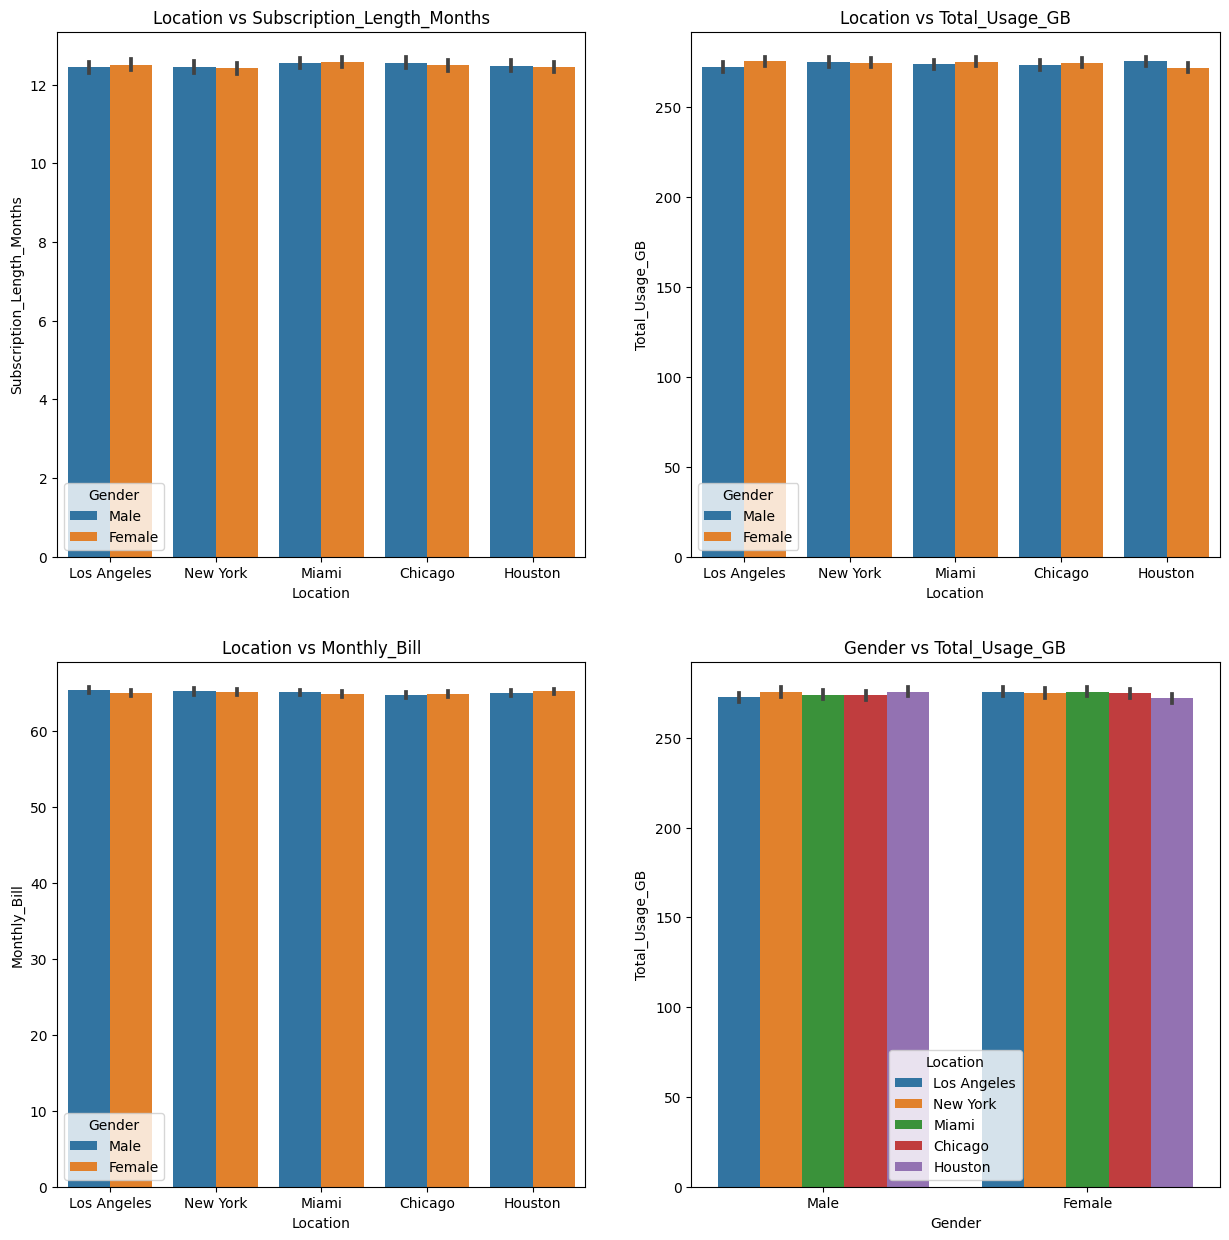

In [139]:
fig, axs = plt.subplots(2, 2, figsize = (15, 15))
plt.subplot(2,2,1)
plt.title('Location vs Subscription_Length_Months')
sns.barplot(data =df, x ='Location', y ='Subscription_Length_Months', hue = 'Gender')

plt.subplot(2,2,2)
plt.title('Location vs Total_Usage_GB')
sns.barplot(data =df, x ='Location', y ='Total_Usage_GB', hue = 'Gender')

plt.subplot(2,2,3)
plt.title('Location vs Monthly_Bill')
sns.barplot(data =df, x ='Location', y ='Monthly_Bill', hue = 'Gender')

plt.subplot(2,2,4)
plt.title('Gender vs Total_Usage_GB')
sns.barplot(data =df, x ='Gender', y ='Total_Usage_GB', hue = 'Location')

plt.show()


INSIGHT: The data is equally distributed

2. Boxplot

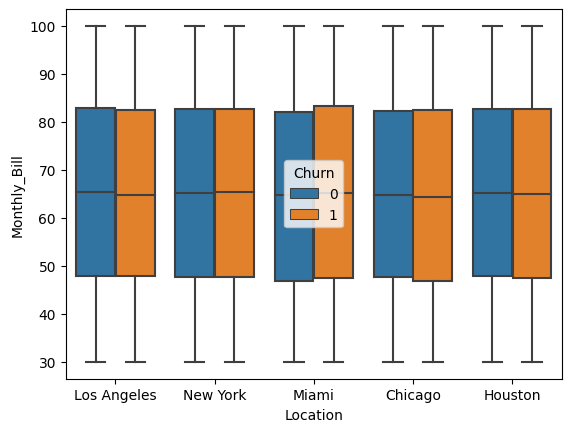

In [140]:
sns.boxplot(data = df, x = 'Location', y = 'Monthly_Bill', hue = 'Churn')
plt.show()

3. KDE plot

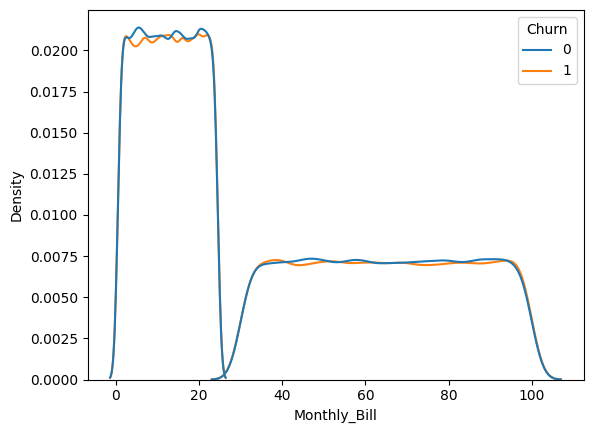

In [145]:
sns.kdeplot(data = df, x = 'Monthly_Bill', hue = 'Churn')
sns.kdeplot(data = df, x = 'Subscription_Length_Months', hue = 'Churn')
plt.show()

#### Categorical vs categorical


1. Heatmap

In [154]:
pd.crosstab(df['Location'], df['Churn'])

Churn,0,1
Location,,
Chicago,10013,9945
Houston,10258,9899
Los Angeles,10161,9880
Miami,9955,10076
New York,9834,9979


<Axes: xlabel='Churn', ylabel='Gender'>

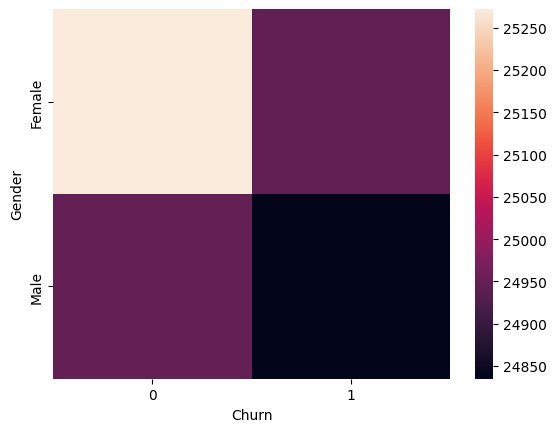

In [155]:
sns.heatmap(pd.crosstab(df['Gender'], df['Churn']))

In [ ]:
import scipy
sns.clustermap(pd.crosstab(df['Gender'], df['Churn']))
plt.show()